# Исседование успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Данные представлены до 2016 год и содержат следующую детализацию:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Задача исследования**: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.


Для этого будут проверены гипотезы:  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Исследование пройдёт в 4 этапа:

1. Обзор данных.  
2. Предобработка данных.  
3. Исследовательнский анализ данных. 
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез исследования.

# 1. Обзор данных. 

Данные представлены до 2016 год и содержат следующую детализацию:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


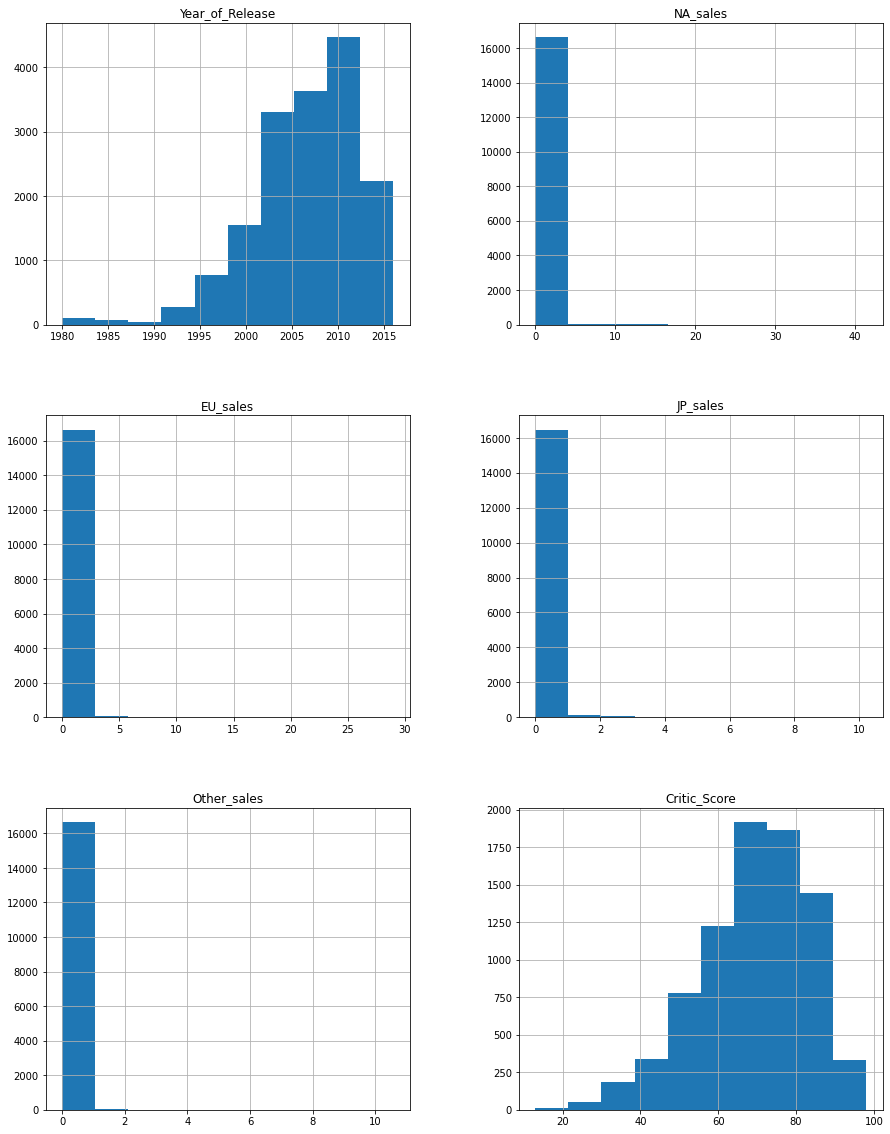

In [4]:
data.hist(figsize=(15, 20));

По предварительной оценке данных, следует проверить и по необходимости заменить тип данных в столбцах:
- Year_of_release
- User_Score  

Названия столбцов привести к нижнему регистру.  
Проверить и обработать пропупуски в данных.

Заметный рост выпуска игр начался после 90х, причем до 2005г, кол-во выпускамых игр удваивалось каждые 5 лет. После 2012 заметен значительный спад в выпуске игр.  

Интересно также отметить, что большинство выпускаемых игр получает хороший отклик критиков - оценку от 60 и выше.



# 2. Предобработка данных.

In [5]:
data.columns = data.columns.str.lower()
# Заменим названия столбцов (приведем к нижнему регистру)

In [6]:
#Определим в каких столбцах есть пропуски.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data.shape

(16715, 11)

In [8]:
data.sort_values(by = 'name', ascending = False).tail(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбце с наименованием игр есть лишь в 2х из 16 714 строк. 
Игры без названия выпущены в 1993г, оценки критикой также отсутсвуют. Вероятна ошибка заполнения или недостаточность данных за прошедший период. Удалим строки с пропусками в наименовании игр, на качество оставшихся данных это не повлияет.

In [9]:
data['name'] = data['name'].fillna(0)
data_new = data.loc[data ['name'] != 0]

In [10]:
data_new.shape

(16713, 11)

Пропуски в столбце с годом выпуска есть в 269 строках из 16 715, это меньше 2% данных.  
Удалим строки с пропусками значений в столбце "year_of_release". Оставшиеся значения преобразуем в целое число.

In [11]:
data_new[data_new['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data_new = data_new.reset_index(drop=True)
data_new['year_of_release'] = data_new['year_of_release'].fillna(0)
#data_new = data_new.dropna(subset = ['year_of_release'])
data_new = data_new.loc[data_new ['year_of_release'] != 0]
data_new['year_of_release'] = data_new['year_of_release'].astype('int')

In [13]:
data_new.shape

(16444, 11)

Пропуски в столбце с жанрам есть в 2х строках из 16 446, это небольшая ошибка, которая не повлияет на итоговые данные.  
Удалим строки с пропусками значений в столбце "genre".

In [14]:
data_new = data_new.reset_index(drop=True)
data_new['genre'] = data_new['genre'].fillna(0)
#data_new = data_new.dropna(subset = ['genre']).reset_index(drop=True)
data_new = data_new.loc[data_new ['genre'] != 0]
#data_new = data_new.reset_index(drop=True)

In [15]:
data_new.shape

(16444, 11)

In [16]:
#Проверим пропуски.
data_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце "user_score" есть значение 'tbd', данные в базу будут добавлены позже после их релиза, пока что для дальнейшего анализа, важно заменить тип для математических измерений. Для этого заменим на numpy nan, а потом конвертируем тип данных к типу float.  Данная замена не будет учтена при дальнейшем изучении данных.
Проверим с какого года есть значения рейтингов для игр.   

In [17]:
data_new.loc[data_new['user_score'] == 'tbd', 'user_score'] = float('nan')
data_new['user_score'] = data_new['user_score'].astype('float')

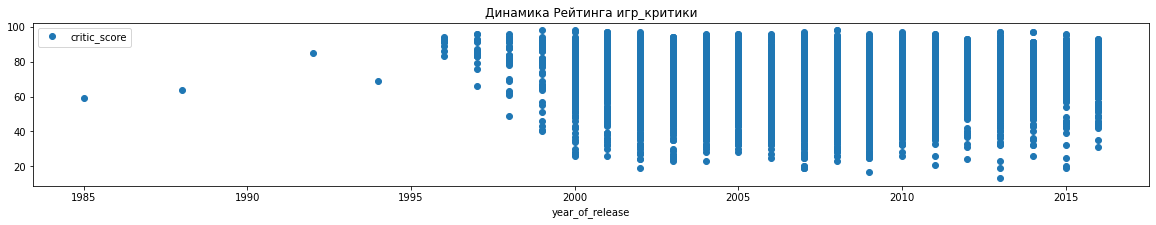

In [18]:
data_new.plot(x='year_of_release', y = ['critic_score'],style='o', title = 'Динамика Рейтинга игр_критики',figsize  = (20,3))
plt.show()

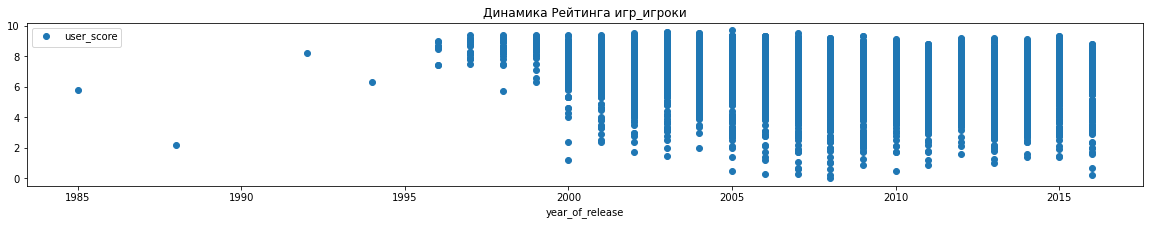

In [19]:
data_new.plot(x='year_of_release', y = ['user_score'],style='o', title = 'Динамика Рейтинга игр_игроки',figsize  = (20,3))
plt.show()

Как видим из графиков выше, данные по рейтингам критиков и пользователей появились после 1995 года. Возможно, до этого оценка игр не была унифицирована или данные за прошлые периоды были недоступны. В рамках нашего анализа пропуски за этот период не критичны, так как для анализа потребуется более актуальный период. Пропуски можно оставить без изменений.

Также большому объему игр не присвоен рейтинг ESRB (англ. Entertainment Software Rating Board). Наличие присвоенного рейтинга не всегда является обязательным условием для продажи игр, поэтому данные пропуски нормальны. Пропуски можно оставить бех изменений.

Проверим наличие дубликатов в базе.

In [20]:
data_new.duplicated().sum()

0

Проверим данные на наличие неявных дубликатов в столбце с названием игр, жанра, платформы

In [21]:
data_new['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
data_new['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
data_new.duplicated(subset=['name', 'platform']).sum()

3

In [24]:
#рповерим различаются ли данные в остальных столбцах
data_new.loc[data_new.duplicated(subset=['name', 'platform', 'year_of_release', 'user_score'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Полный дубликат найдет только в одной строке, удалим дубль из данных.

In [25]:
data_new.shape

(16444, 11)

In [26]:
data_new = data_new.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'user_score']).reset_index()

In [27]:
data_new.shape

(16443, 12)

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [28]:
data_new['total_sales'] = data_new.loc[:,'na_sales':'other_sales'].sum(axis = 1)

Итого в рамках предобработки данных были выполнены следующие шаги:
- скорректированы наименования столбцов для дальнейшего удобства обработки;
- выявлены и удалены пропуски "name", "genre", "year_of_release". Важно отметить что строки с пропусками в столбцах "name", "genre", "year_of_release" были удалены полностью. Удаленные данные занимают менее 1.7% данных и их исключение не критично для анализа.
- пропуски в столбцах "user_score", "critic_score", "rating" оставлены в базе без удаления. Пропуски в данных столбцах означают отсутсвие оценки по причине давности данных: массовая оценка игр началась после 1994г, пропуски до этого года нормальны; или недостаточности данных: предполагается дозаполнение базы данных в будущем. Заполнение пропусков медианным значением было бы некорректно так как могло бы исказить реальную картину популярности той или иной игры. Данная особенность базы будет учтена при анализе;
- удалены дубликаты в строках;
- добавлен столбц с тотальными продажам по всем регионам.

# 3. Исследовательнский анализ данных. 

Посмотрим, сколько игр выпускалось в разные годы с учетом выпуска на разных платформах. 

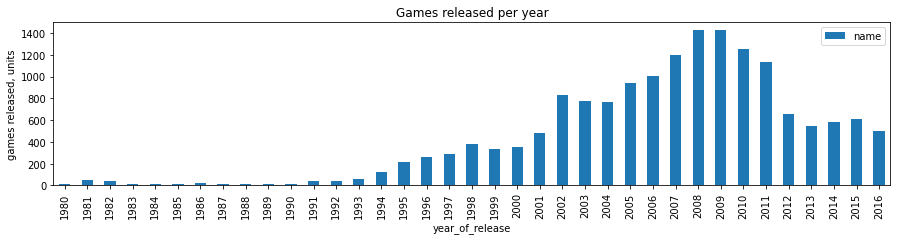

In [29]:
games_released_per_year = data_new.pivot_table(index='year_of_release',values = 'name', aggfunc = 'count')
games_released_per_year.plot(kind= 'bar',figsize = (15,3),\
                             title = 'Games released per year',\
                             xlabel = 'year_of_release', \
                             ylabel = 'games released, units');

Основной скачок выпуска игр начался с 1994 года вплоть до 2008г, когда глобальный кризис вынудил многих издателей сократить объемы производства. с 2013 года наблюдаем незначительный рост.
Для дальнейшего анализа предлагается опустить период до 1994 г.

Посмотрим также как менялись продажи по платформам, для этого рассмотрим Топ-10 по тотал объему продаж за период 1994 - 2016.

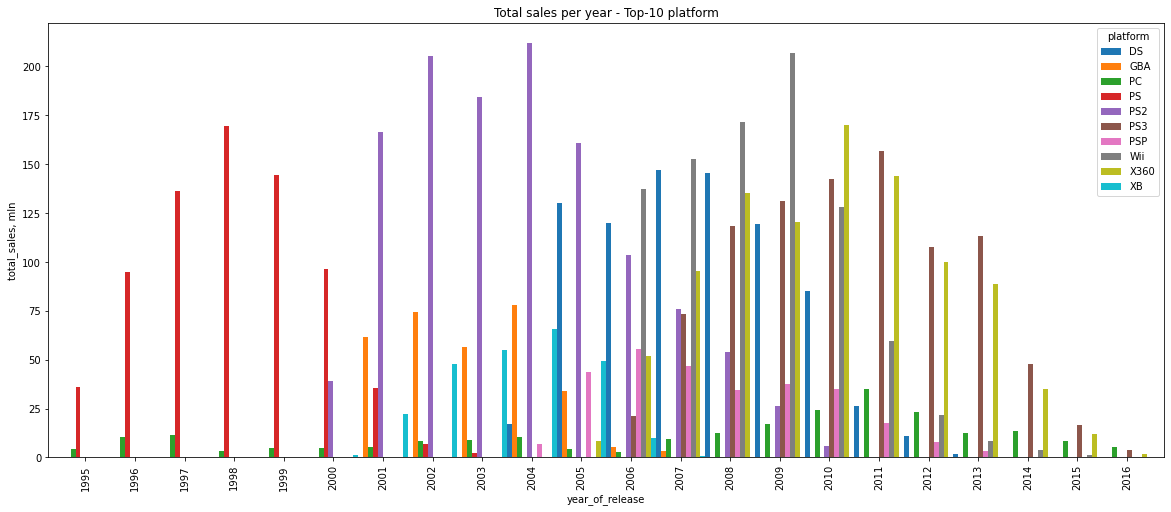

In [30]:
top_platform = data_new.groupby('platform')['total_sales'].count().sort_values()
top_platform = top_platform.tail(10)
top_platform_name = top_platform.index

total_sales_per_platform = data_new.query('platform in @top_platform_name').\
pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

total_sales_per_platform = total_sales_per_platform.query ('year_of_release > 1994')

total_sales_per_platform.plot(kind= 'bar',figsize = (20,8),\
                             title = 'Total sales per year - Top-10 platform',\
                             xlabel = 'year_of_release', \
                             ylabel = 'total_sales, mln',\
                             width = 1);

Четко прослеживается жизненный цикл платформы на которой выпускаются игры - в среднем это 6 лет, причем, пик продаж наступает на 2-4 год. 
Расцвет выпуска игр на различных платформах начался с 2000х годов.
Рассмотрим также подробнее актуальный период с 2014 по 2016 годы, расширив выборку до всех платформ для прогноза активности на 2017г.

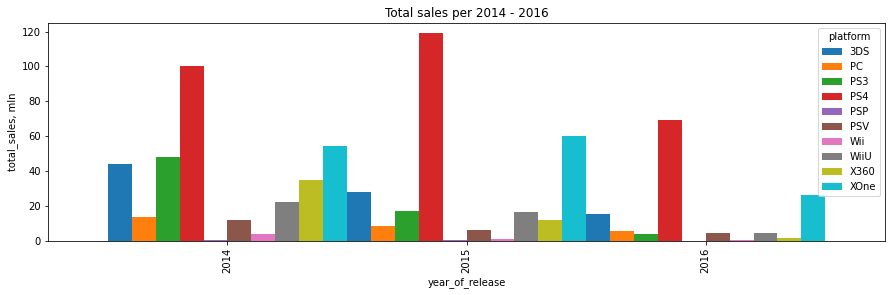

In [31]:
top_platform_3_years = data_new.groupby('platform')['total_sales'].count().sort_values()
top_platform_name_3_years = top_platform_3_years.index

total_sales_per_platform_3_years = data_new.query('platform in @top_platform_name_3_years' and 'year_of_release > 2013')

total_sales_per_platform_3_years_pivot = total_sales_per_platform_3_years.pivot_table(index='year_of_release', \
                                                                                      columns = 'platform', \
                                                                                      values = 'total_sales', aggfunc = 'sum')

#total_sales_per_platform_3_years = total_sales_per_platform_3_years.query ('year_of_release > 2013')

total_sales_per_platform_3_years_pivot.plot(kind= 'bar',figsize = (15,4),\
                             title = 'Total sales per 2014 - 2016',\
                             xlabel = 'year_of_release', \
                             ylabel = 'total_sales, mln',\
                             width = 1);

Данные за 2016 год не полные, но, согласно среднему жизненному циклу платформ, можем сделать предположение об активных платформах на 2016 и следующий год: продолжит поддерживаться PS4, XOne, 3DS, меньше PC и PS3.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

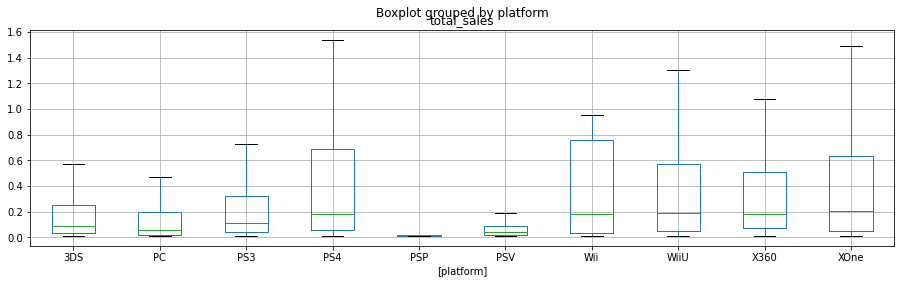

In [32]:
total_sales_per_platform_3_years.boxplot(by = ['platform'], column = ['total_sales'], \
                                         figsize =(15,4), grid= True, showfliers=False);

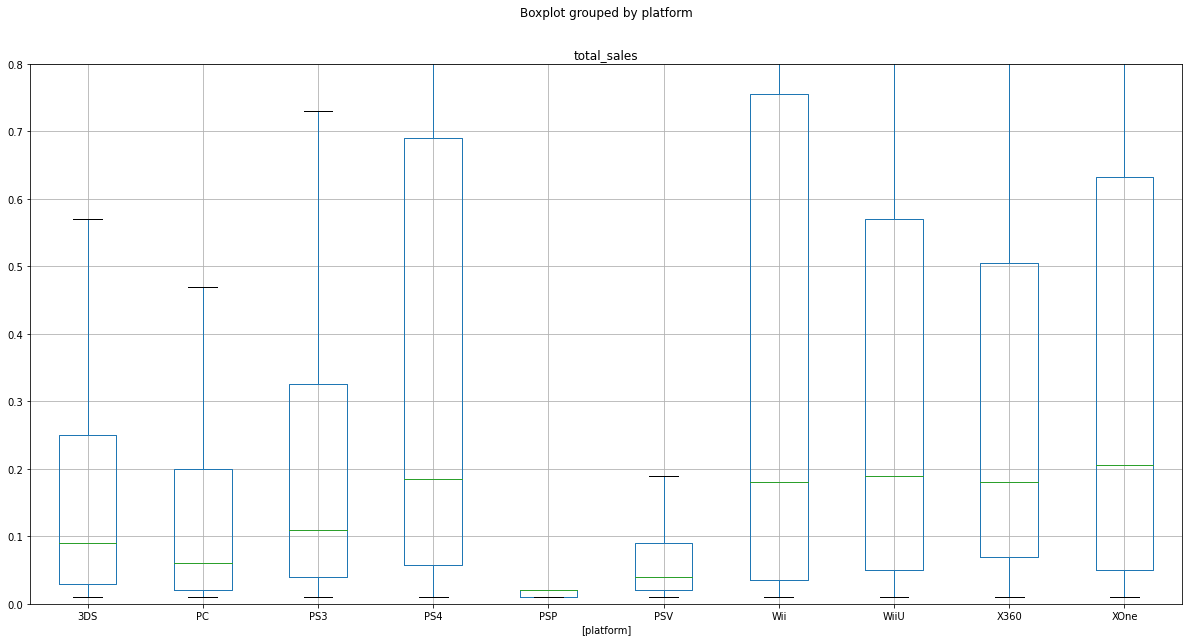

In [33]:
total_sales_per_platform_3_years.boxplot(by = ['platform'], column = ['total_sales'], \
                                         figsize =(20,10), grid= True, showfliers=False);
plt.ylim(0, 0.80)
plt.show()

Для всех платформ характерен сильный разброс продаж игр внутри платформы: медианные значения ниже среднего, т.е. кол-во проданных копий большинства игр выше среднего.
На платформах PS4,Wii, а также XOne зафиксирован самый высокий уровень продаж игр:  0.57 - 0.8 млн копий. 
При этом 50% объема продаж для Топ платформ лежит в промежутке 0.03 - 0.3 млн копий.

In [34]:
#создадим список платформ для анализа
top_platform_name_3_years = total_sales_per_platform_3_years.groupby('platform')['total_sales'].count().sort_values()
top_platform_name_3_years = top_platform_name_3_years.tail(10)
top_platform_name_3_years = top_platform_name_3_years.index
top_platform_name_3_years

Index(['Wii', 'PSP', 'WiiU', 'X360', 'PC', '3DS', 'PS3', 'XOne', 'PSV', 'PS4'], dtype='object', name='platform')

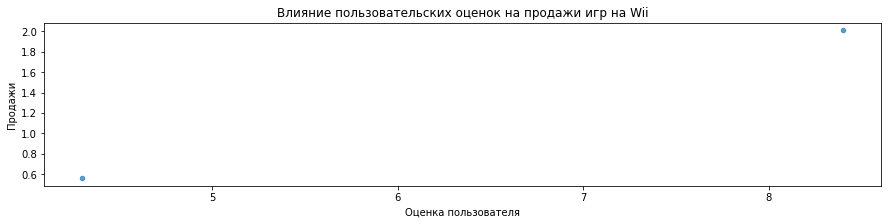

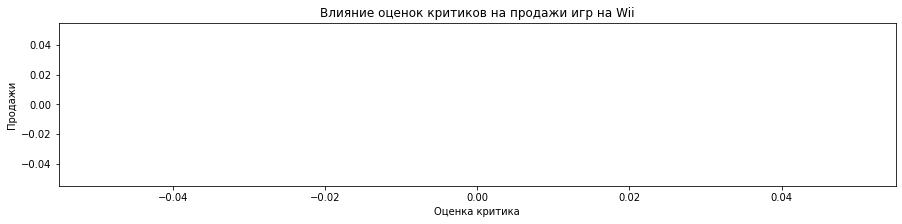

,user_score,critic_score,total_sales
user_score,1.0,NaN,1.0
critic_score,NaN,NaN,NaN
total_sales,1.0,NaN,1.0


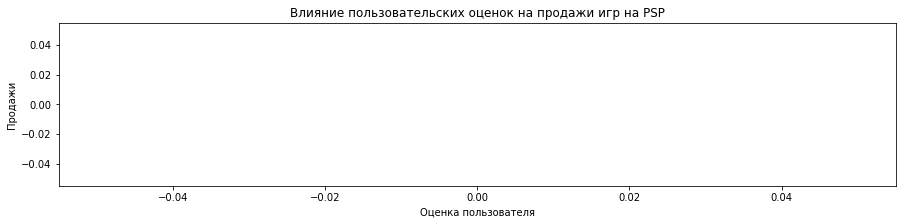

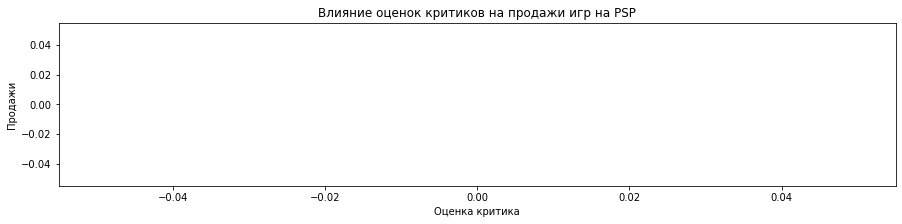

,user_score,critic_score,total_sales
user_score,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
total_sales,NaN,NaN,NaN


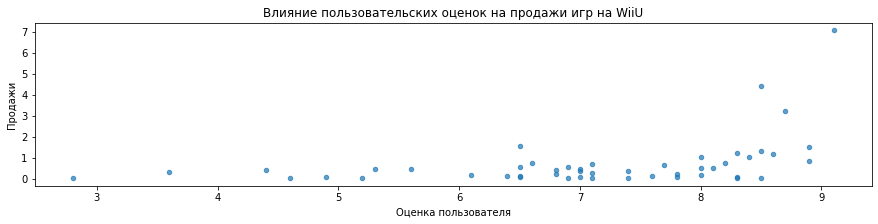

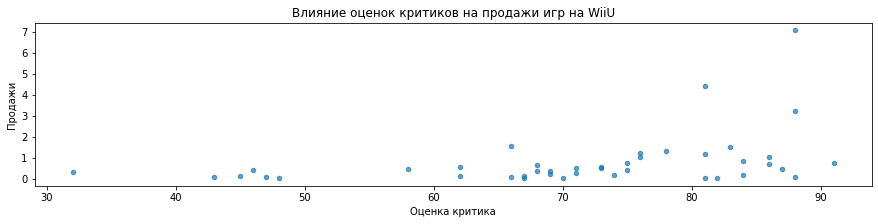

,user_score,critic_score,total_sales
user_score,1.000000,0.763536,0.407926
critic_score,0.763536,1.000000,0.375640
total_sales,0.407926,0.375640,1.000000


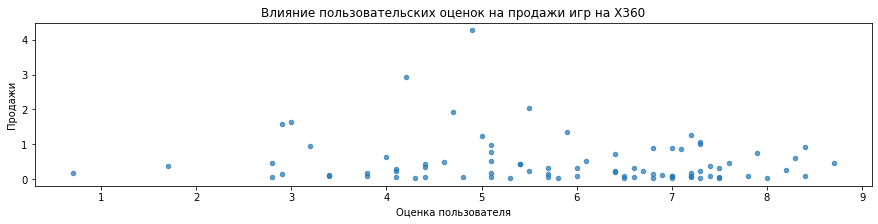

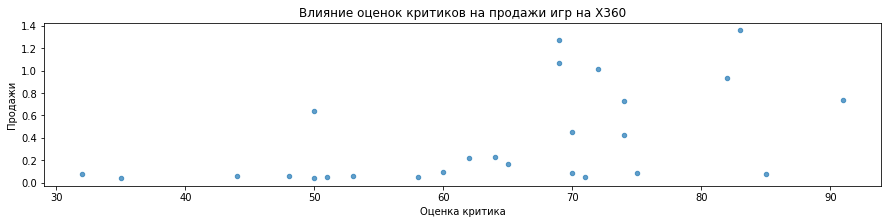

,user_score,critic_score,total_sales
user_score,1.000000,0.625309,-0.138445
critic_score,0.625309,1.000000,0.525723
total_sales,-0.138445,0.525723,1.000000


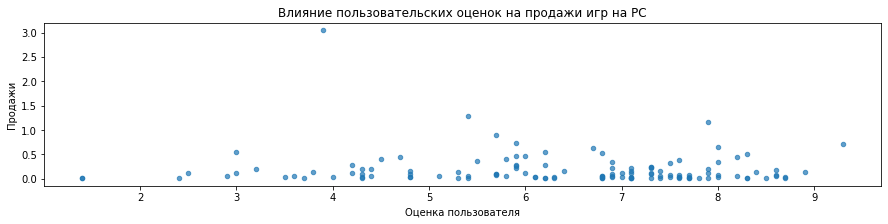

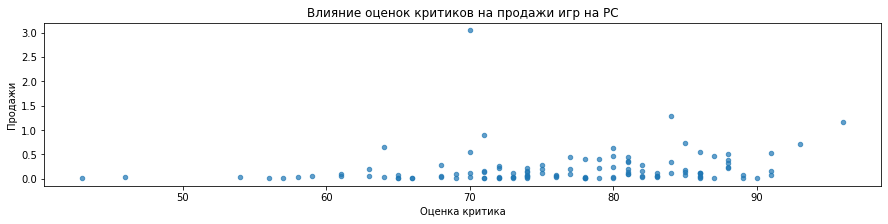

,user_score,critic_score,total_sales
user_score,1.000000,0.466099,-0.071597
critic_score,0.466099,1.000000,0.172061
total_sales,-0.071597,0.172061,1.000000


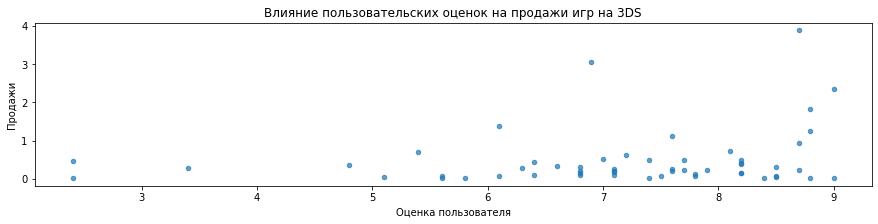

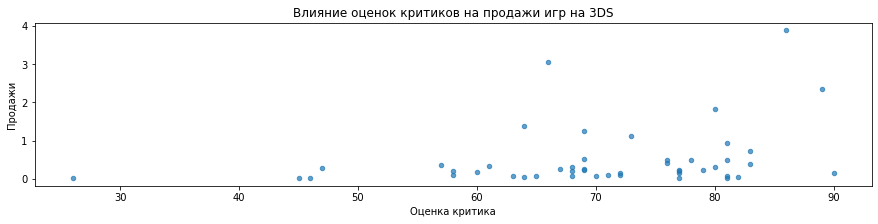

,user_score,critic_score,total_sales
user_score,1.000000,0.862485,0.215193
critic_score,0.862485,1.000000,0.284686
total_sales,0.215193,0.284686,1.000000


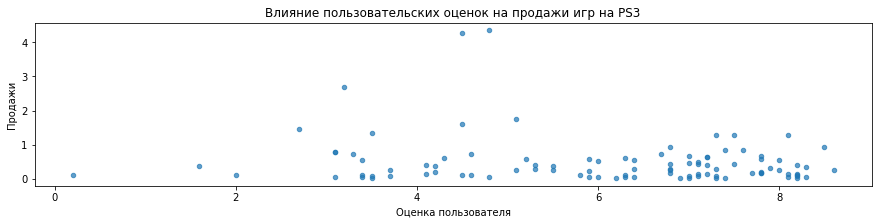

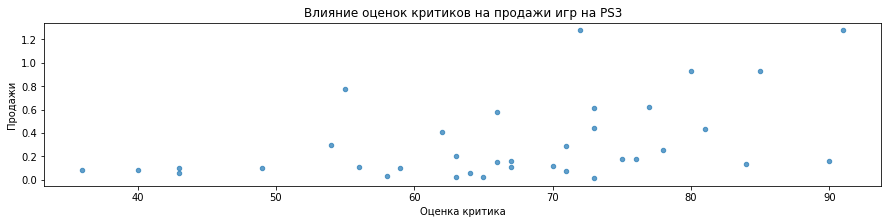

,user_score,critic_score,total_sales
user_score,1.000000,0.693445,-0.166761
critic_score,0.693445,1.000000,0.446575
total_sales,-0.166761,0.446575,1.000000


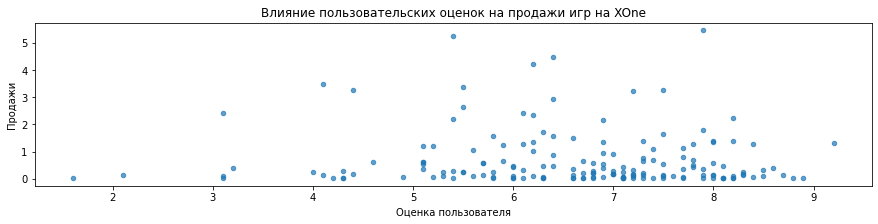

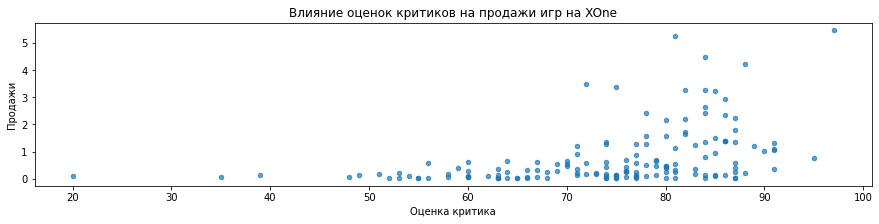

,user_score,critic_score,total_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.422112
total_sales,-0.070384,0.422112,1.000000


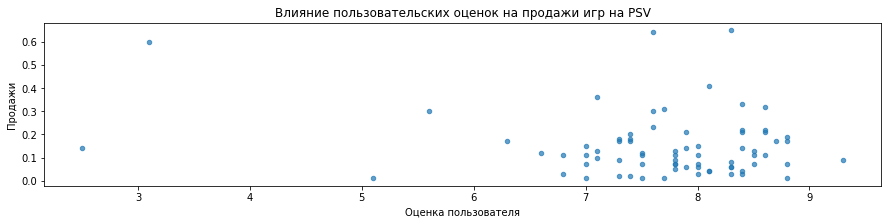

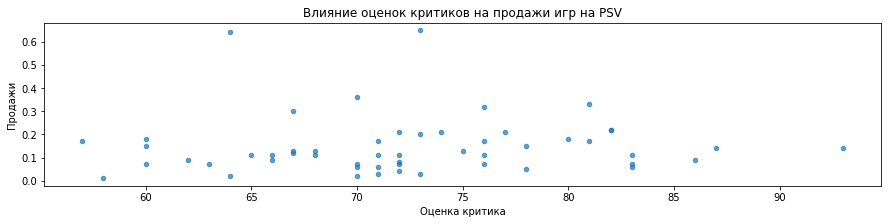

,user_score,critic_score,total_sales
user_score,1.000000,0.524066,-0.168455
critic_score,0.524066,1.000000,0.041029
total_sales,-0.168455,0.041029,1.000000


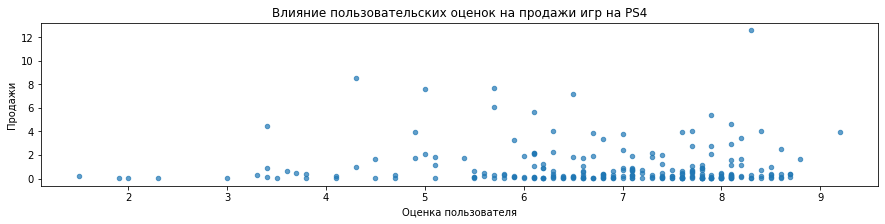

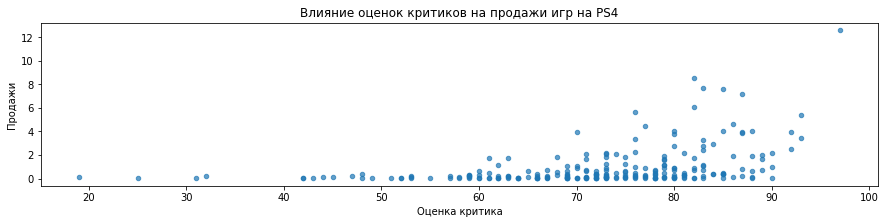

,user_score,critic_score,total_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.401903
total_sales,-0.040132,0.401903,1.000000


In [35]:
   
#Сократим датафрейм до того, в котором оценок не менее 100
data_top_platform_dropped = total_sales_per_platform_3_years[total_sales_per_platform_3_years['user_score']<100]
 
#Построим для каждой платформы диаграммы рассеяния продаж в зависимости от оценок
for platform in top_platform_name_3_years:
    data_for_corr = data_top_platform_dropped.query('platform == @platform')
    x = data_for_corr\
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, figsize=(15,3))\
    .set(title=f'Влияние пользовательских оценок на продажи игр на {platform}',xlabel='Оценка пользователя', ylabel='Продажи');
    y = data_for_corr\
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, figsize=(15,3))\
    .set(title=f'Влияние оценок критиков на продажи игр на {platform}',xlabel='Оценка критика', ylabel='Продажи');
    plt.show()
#И коэффициент корреляции
    correlation = data_for_corr[['user_score','critic_score','total_sales']].corr()
    display(correlation)

Оценка пользователей не имеет линейной связи с продаваемостью игр.  
При том, что в большинстве случаев, оценка пользователей схожа с критиками, оценка критиков имеет слабо выраженную (>0.4) связь с продажами.  
Чем больше оценка игры на платформе, тем выше продажи - это правило действует для всех платформ.

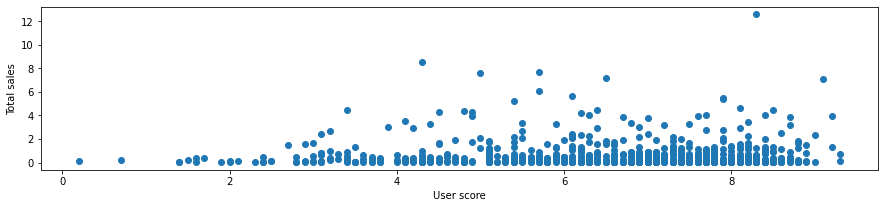

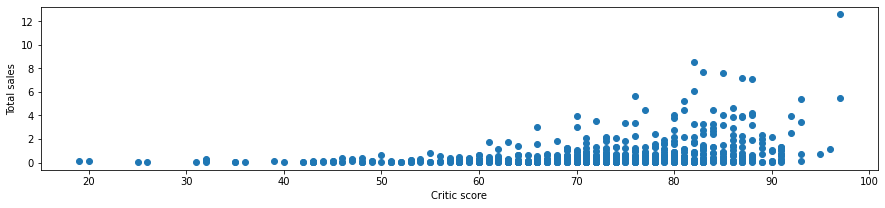

In [36]:
#Посмотрим как рейтинги в целом влияют на продажи с 2014 г
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = total_sales_per_platform_3_years['user_score'], y = total_sales_per_platform_3_years['total_sales'])
plt.xlabel("User score")
plt.ylabel("Total sales")

fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = total_sales_per_platform_3_years['critic_score'], y = total_sales_per_platform_3_years['total_sales'])
plt.xlabel("Critic score")
plt.ylabel("Total sales")

plt.show()

Больше всего продаж игр с рейтингом критиков выше 70, рейтинг пользователей выше 6.

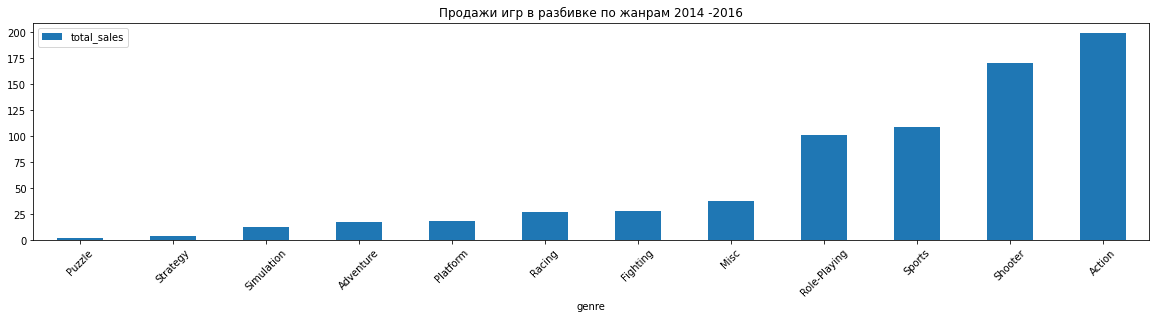

In [37]:
genre_total_sales = total_sales_per_platform_3_years.pivot_table(index= 'genre', \
                                                  values = 'total_sales', aggfunc= 'sum').sort_values(by='total_sales')

genre_total_sales.plot(kind='bar', title='Продажи игр в разбивке по жанрам 2014 -2016', figsize = (20,4), rot=45);


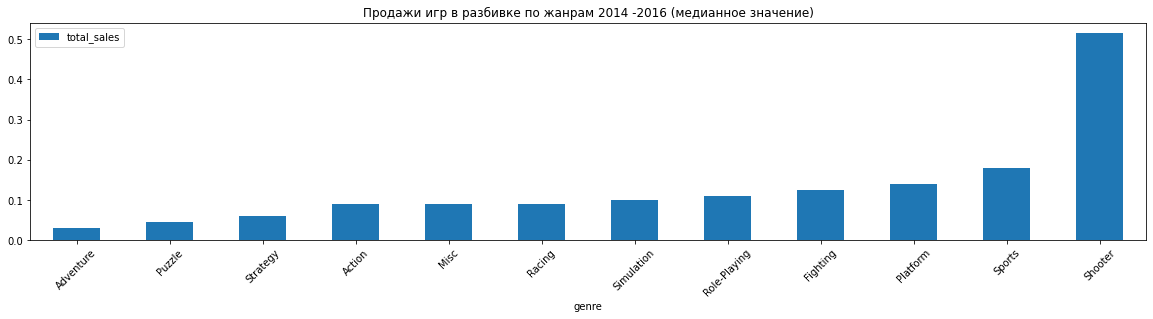

In [38]:
genre_total_sales = total_sales_per_platform_3_years.pivot_table(index= 'genre', \
                                                  values = 'total_sales', aggfunc= 'median').sort_values(by='total_sales')

genre_total_sales.plot(kind='bar', title='Продажи игр в разбивке по жанрам 2014 -2016 (медианное значение)', figsize = (20,4), rot=45);


Наибольший объем продаж приходится на игры жанра  Action и Shooter, при этом по медианной прибыльности за игру, жанры распределяются иным образом: 
Топ-5 прибыльных жанра : Shooter, Sports, Platform, Fighting, Role-Playing.

# 4. Составление портрета пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP) за актуальный период 2014 - 2016г:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияние оценки критиков на продажи в регионе
- Влияние рейтинг ESRB на продажи в регионе


Рассмотрим Северо-Американский регион (NA)

In [39]:
#определим портрет пользователя NA региона за период 2014 - 2016
na_top_5_platform_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['platform'], values = 'na_sales', aggfunc = 'sum').\
sort_values (by='na_sales', ascending  = False)
na_top_5_platform_2014_2016.head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


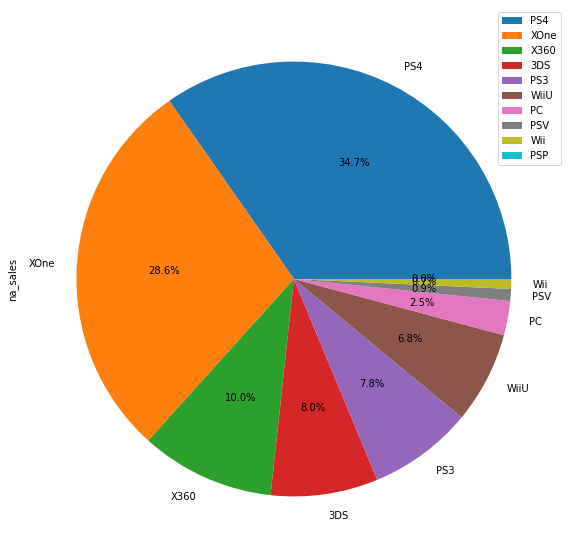

In [40]:
na_top_5_platform_2014_2016.plot(kind = 'pie',
     y='na_sales',
     figsize = (10,10),
     autopct='%1.1f%%');

In [41]:
#определим портрет пользователя NA региона за период 2014 - 2016
na_top_5_genre_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['genre'], values = 'na_sales', aggfunc = 'sum').\
sort_values (by='na_sales', ascending  = False)
na_top_5_genre_2014_2016.head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


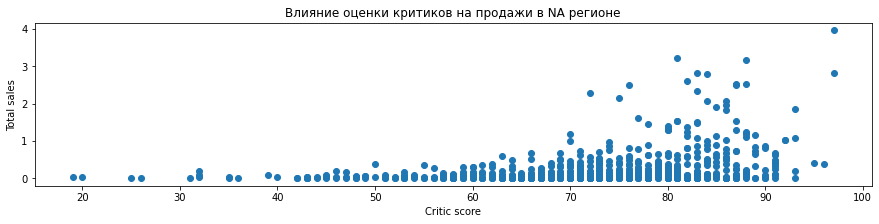

In [42]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = total_sales_per_platform_3_years['critic_score'], y = total_sales_per_platform_3_years['na_sales'])
plt.xlabel("Critic score")
plt.ylabel("Total sales")
plt.title("Влияние оценки критиков на продажи в NA регионе")

plt.show()

In [43]:
total_sales_per_platform_3_years['critic_score'].corr(total_sales_per_platform_3_years['na_sales'])

0.333305881327296

In [44]:
#обработаем пропуски в столбце с рейтингов для анализа
total_sales_per_platform_3_years = total_sales_per_platform_3_years.reset_index(drop=True)
total_sales_per_platform_3_years ['rating'] =  total_sales_per_platform_3_years['rating'].fillna(0)

In [45]:
total_sales_per_platform_3_years ['rating'] =  total_sales_per_platform_3_years['rating'].replace (0, 'n_a')

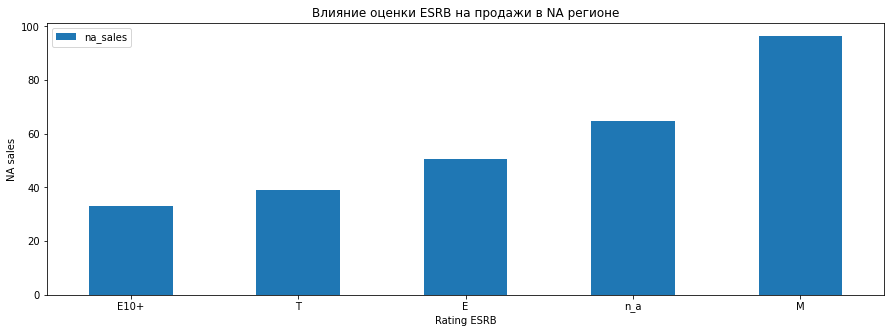

In [46]:
rating_na_sales = total_sales_per_platform_3_years.pivot_table(index= 'rating', values = 'na_sales', aggfunc= 'sum').\
sort_values(by='na_sales')

rating_na_sales.plot(kind = 'bar', figsize=(15, 5), xlabel= 'Rating ESRB', \
                     ylabel='NA sales', title = 'Влияние оценки ESRB на продажи в NA регионе', rot = 0);

В Северо-Американском регионе пользуются популярностью игры с рейтингом ESRB: M, E  и T. Важно отметить, что большому объему игр рейтинг не присвоен, данная ситуация нормальна, но в случае наличия информации по этим играм, результат топ рейтингов может измениться.

Портрет пользователя в  Северо-Американском регионе: 

Топ-5 платформ по объему продаж: PS4 (34.7%), XOne (28.6%), X360 (10.0%), 3DS (8.0%) PS3 (7.8%), WiiU (6.8%). Прочие > 3% объема продаж.
Наиболее популярные жанры: Shooter, Action,Sports, Role-Playing, Misc.
Больший объем продаж приходится на игры с оценкой критиков выше 60. 
В Северо-Американском регионе пользуются популярностью игры с рейтингом: M, E, T, E10+

Рассмотрим Европейском регионе (EU)

In [47]:
#определим портрет пользователя EU региона за период 2014 - 2016
eu_top_5_platform_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['platform'], values = 'eu_sales', aggfunc = 'sum').\
sort_values (by='eu_sales', ascending  = False)
eu_top_5_platform_2014_2016.head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


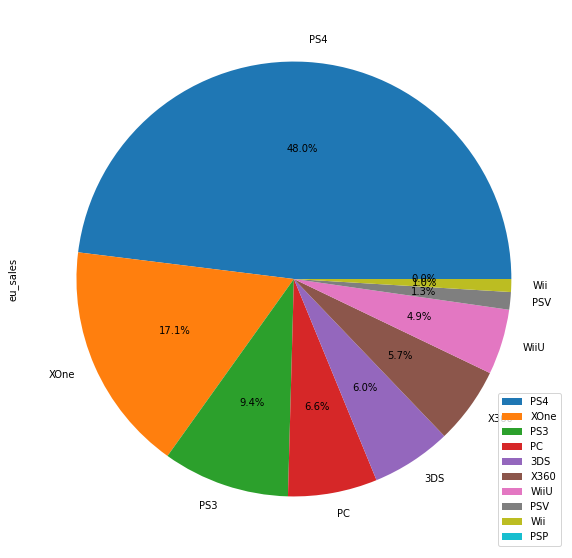

In [48]:
eu_top_5_platform_2014_2016.plot(kind = 'pie',
     y='eu_sales',
     figsize = (10,10),
     autopct='%1.1f%%');

In [49]:
#определим портрет пользователя EU региона за период 2014 - 2016
eu_top_5_genre_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['genre'], values = 'eu_sales', aggfunc = 'sum').\
sort_values (by='eu_sales', ascending  = False)
eu_top_5_genre_2014_2016.head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


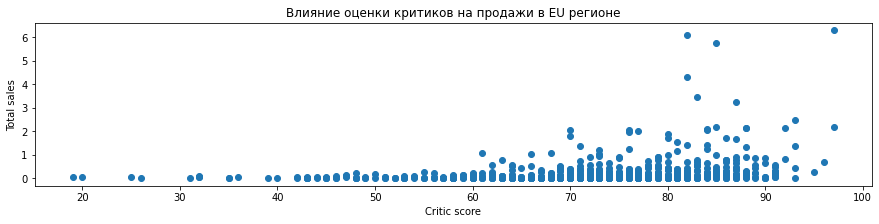

In [50]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = total_sales_per_platform_3_years['critic_score'], y = total_sales_per_platform_3_years['eu_sales'])
plt.xlabel("Critic score")
plt.ylabel("Total sales")
plt.title("Влияние оценки критиков на продажи в EU регионе")

plt.show()

In [51]:
total_sales_per_platform_3_years['critic_score'].corr(total_sales_per_platform_3_years['eu_sales'])

0.2708256036129555

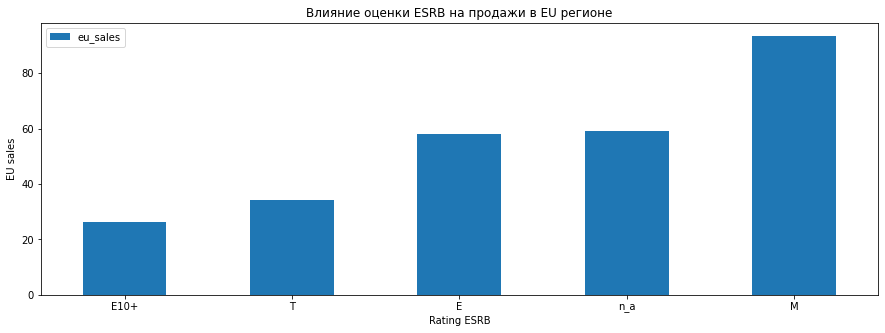

In [52]:
rating_eu_sales = total_sales_per_platform_3_years.pivot_table(index= 'rating', values = 'eu_sales', aggfunc= 'sum').sort_values(by='eu_sales')

rating_eu_sales.plot(kind = 'bar', figsize=(15, 5), xlabel= 'Rating ESRB', \
                     ylabel='EU sales', title = 'Влияние оценки ESRB на продажи в EU регионе', rot=0);

В Европейском регионе пользуются популярностью игры с рейтингом ESRB: M, E T. Важно отметить, что большому объему игр рейтинг не присвоен, данная ситуация нормальна, к тому же присвоением играм рейтинга в европейском регионе занимается другая организация  -  PEGI (в базе данные только по ESRB), но в случае наличия информации по этим играм, результат топ рейтингов может измениться.

Портрет пользователя в  Европейском регионе: 

Топ-5 платформ по объему продаж: PS4 (48.0%), XOne (17.1%), PS3 (9.4%), PC (6.6%), 3DS (6.0%), X360 (5.7%), WiiU (4.9%). Прочие > 1.4% объема продаж.
Наиболее популярные жанры: Action, Shooter, Sports, Role-Playing, Racing.
Больший объем продаж приходится на игры с оценкой критиков выше 70. 
В Европейском регионе пользуются популярностью игры с рейтингом: M, E, T, E10+

Рассмотрим Японский регион (JP)

In [53]:
#определим портрет пользователя JP региона за период 2014 - 2016
jp_top_5_platform_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['platform'], values = 'jp_sales', aggfunc = 'sum').\
sort_values (by='jp_sales', ascending  = False)
jp_top_5_platform_2014_2016.head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


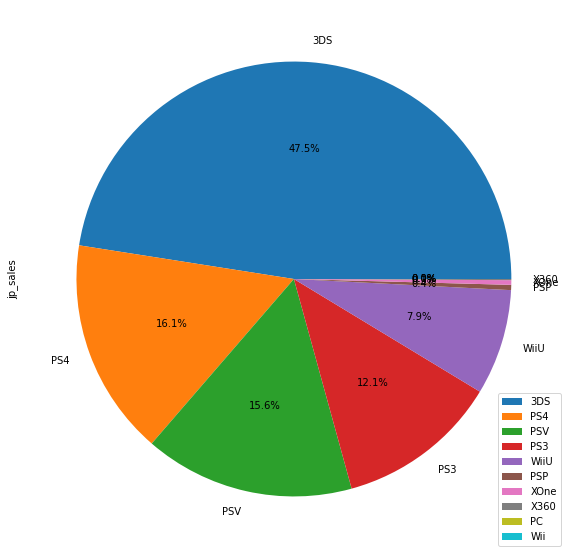

In [54]:
jp_top_5_platform_2014_2016.plot(kind = 'pie',
     y='jp_sales',
     figsize = (10,10),
     autopct='%1.1f%%');

In [55]:
#определим портрет пользователя JP региона за период 2014 - 2016
jp_top_5_genre_2014_2016 = total_sales_per_platform_3_years.\
pivot_table(index = ['genre'], values = 'jp_sales', aggfunc = 'sum').\
sort_values (by='jp_sales', ascending  = False)
jp_top_5_genre_2014_2016.head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


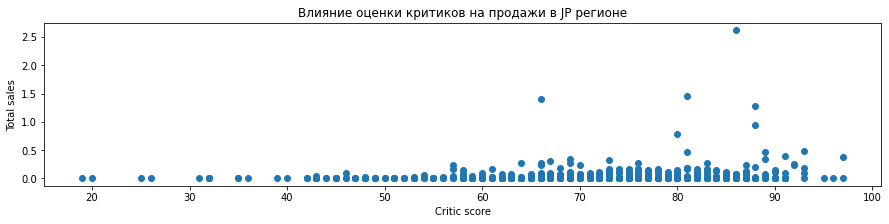

In [56]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = total_sales_per_platform_3_years['critic_score'], y = total_sales_per_platform_3_years['jp_sales'])
plt.xlabel("Critic score")
plt.ylabel("Total sales")
plt.title("Влияние оценки критиков на продажи в JP регионе")

plt.show()

In [57]:
total_sales_per_platform_3_years['critic_score'].corr(total_sales_per_platform_3_years['jp_sales'])

0.13031600694924872

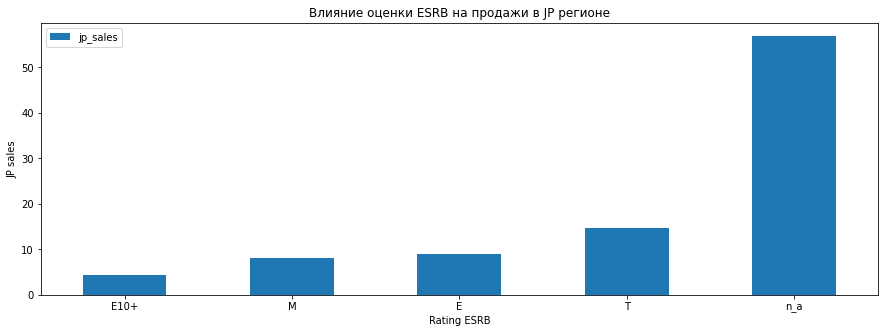

In [58]:
rating_jp_sales = total_sales_per_platform_3_years.pivot_table(index= 'rating', values = 'jp_sales', aggfunc= 'sum').sort_values(by='jp_sales')

rating_jp_sales.plot(kind = 'bar', figsize=(15, 5), xlabel= 'Rating ESRB', \
                     ylabel='JP sales', title = 'Влияние оценки ESRB на продажи в JP регионе', rot=0);

По имеющимся данным, в Японском регионе пользуются популярностью игры с рейтингом ESRB: T, E, M, E10+. Важно отметить особенность региона: присвоением играм возрастного рейтинга в японском регионе занимается другая органиация - CEPO, в то время как в базе указан рейтинг ESRB. Реальную картину по популярности игр с тем или иным рейтингам, по имеющимся данным достоверно определить невозможно.

Портрет пользователя в  Японском регионе: 

Топ-5 платформ по объему продаж: 3DS (47.5%), PS4 (16.1%), PSV (15.6%), PS3 (12,1%), WiiU (7.9%). Прочие > 1%.
Наиболее популярные жанры: Action, Role-Playing, Shooter, Fighting, Sports.
Больший объем продаж приходится на игры с оценкой критиков выше 75. 
В Японском регионе пользуются популярностью игры с рейтингом: T, E, M, E10+. Достоверно определить топ рейтинга игр по имеющиммся данным невозможно.

# 5. Проверка гипотез исследования.

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (гипотеза - H0). 
Соответнсвенно альтернативная гипотеза - средние расходятся.


In [59]:
from scipy import stats as st
import scipy.stats

data_new_user_score = total_sales_per_platform_3_years.dropna() #удалим пропуски в датафрейме для проверки гипотезы


user_score_xbox = data_new_user_score.query('platform == "XOne"')
user_score_xbox = user_score_xbox.loc[:, ['user_score']]
                              
user_score_pc = data_new_user_score.query('platform == "PC"')
user_score_pc = user_score_pc.loc[:, ['user_score']]

alpha = .05
results = scipy.stats.ttest_ind(user_score_xbox, user_score_pc, equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергнуть нулевую гипотезу')

p-значение: [0.14037852]
не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть гипотезу о том, что средние пользовательских рейтингов платформ Xbox One и PC равны, соответственно, они могут значимо различаться.

Проверим гипотезу о расхождении средних пользовательских рейтингов жанров Action и Sports (гипотеза - H0). Соответнсвенно альтернативная гипотеза - средние одинаковые.

In [60]:
user_score_action = data_new_user_score.query('genre == "Action"')
user_score_action = user_score_action.loc[:, ['user_score']]

user_score_sports = data_new_user_score.query('genre == "Sports"')
user_score_sports = user_score_sports.loc[:, ['user_score']]

alpha = .05
results = scipy.stats.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print ('не получилось отвергнуть нулевую гипотезу')
else:
    print ('отвергаем нулевую гипотезу')

p-значение: [8.32761298e-09]
не получилось отвергнуть нулевую гипотезу


Вывод: У нас нет оснований утверждать, что средние пользовательских рейтингов одинаковые.

# 6. Выводы.

Анализ данных выявил несколько факторов, влияющих на продажи игр:
- оценка критиков и пользователей
- жанр
- рейтинг
- регион
- платформа

**Оценка критиков и пользователей**  
Оценка пользователей не имеет линейной связи с продаваемостью игр.
При том, что в большинстве случаев, оценка пользователей схожа с критиками, оценка критиков имеет слабо выраженную (>0.4) связь с продажами.
Чем больше оценка игры на платформе, тем выше продажи - это правило действует для всех платформ.

**Жанр**  
Наибольший объем продаж приходится на игры жанра Action и Shooter, при этом по медианной прибыльности за игру, жанры распределяются иным образом: Топ-5 прибыльных жанра : Shooter, Sports, Platform, Fighting, Role-Playing.

**Рейтинг**  
Во всех регионах используется локальные организации для присвоения играм возрастного рейтинга. Так как в базе данных присутсвуют только рейтинги ESRB, достоверно определить игры с какими рейтингами лидируют, невозможно. Попупопулярностью пользуются игры с рейтингом: M, Е, T, но доля и первенство в рамках исследования не выявлено.

**Регион**  
Наибольший объем продаж приходится на Северо-Ампериканский регион. 
Топ-платформы для NA: PS4 (34.7%), XOne (28.6%), X360 (10.0%).  
Для Европейского региона:PS4 (48.0%), XOne (17.1%), PS3 (9.4%).
Для JP регионе лидирует платформы модели 3DS (47.5%), PS4 (16.1%), PSV (15.6%), Xbox пользуется наименьшим спросом.

**Платформа**  
Данные за 2016 год не полные, но, согласно среднему жизненному циклу платформ, можем сделать предположение об активных платформах на 2016 и следующий год: продолжит поддерживаться PS4, XOne, 3DS, меньше продаж придется на PC и PS3. 




Проверка гипотез исследования привела к следующим результатам:  
- Не получилось отвергнуть гипотезу о том, что средние пользовательских рейтингов платформ Xbox One и PC равны, соответственно, они могут значимо различаться.
- У нас нет оснований утверждать, что средние пользовательских рейтингов одинаковые.